In [3]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [4]:
X_train.shape
X_train.dtype

dtype('uint8')

In [5]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255, X_test / 255.

In [6]:
class_names = ["T-shirt/top", 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
class_names[y_train[0]]

'Ankle boot'

In [8]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28, 28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [13]:
hidden1 = model.layers[1]
hidden1.name
model.get_layer('dense_35') is hidden1

ValueError: No such layer: dense_35. Existing layers are: ['flatten', 'dense', 'dense_1', 'dense_2'].

In [66]:
weights, biases = hidden1.get_weights()
weights
weights.shape
biases
biases.shape

(300,)

In [67]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [68]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6891 - loss: 0.9782 - val_accuracy: 0.8268 - val_loss: 0.5082
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8288 - loss: 0.5013 - val_accuracy: 0.8378 - val_loss: 0.4551
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8451 - loss: 0.4469 - val_accuracy: 0.8436 - val_loss: 0.4300
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8556 - loss: 0.4167 - val_accuracy: 0.8484 - val_loss: 0.4137
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8620 - loss: 0.3955 - val_accuracy: 0.8524 - val_loss: 0.4014
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8673 - loss: 0.3786 - val_accuracy: 0.8554 - val_loss: 0.3932
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8711 - loss: 0.3647 - val_accuracy: 0.8558 - val_loss: 0.3850
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8755 - loss: 0.3524 - 

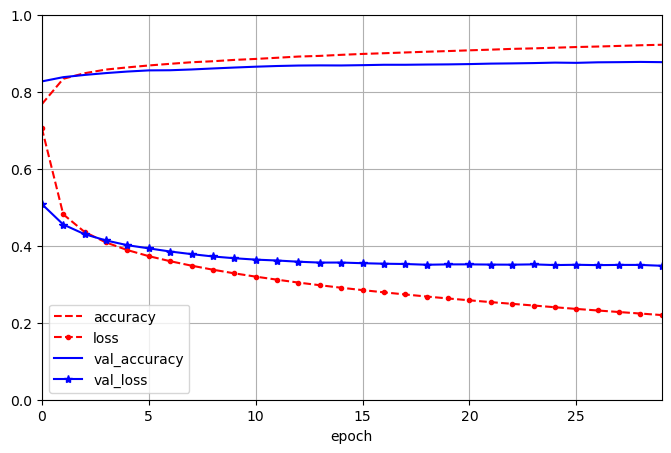

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0,29], ylim=[0,1], grid=True, xlabel='epoch',
    style=['r--','r--.','b-','b-*'])
plt.show()

In [70]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8745 - loss: 0.3655


[0.3667885959148407, 0.8752999901771545]

In [71]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.01, 0.  , 0.87],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [72]:
import numpy as np
y_pred = y_proba.argmax(axis=1)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [73]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [74]:
# Now let's build a regression model to predict the price of a house
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)
y_pred

c:\Users\andycho\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - RootMeanSquaredError: 3.1302 - loss: 9.9272 - val_RootMeanSquaredError: 2.8951 - val_loss: 8.3816
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - RootMeanSquaredError: 2.8800 - loss: 8.2947 - val_RootMeanSquaredError: 2.8970 - val_loss: 8.3929
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - RootMeanSquaredError: 2.8778 - loss: 8.2819 - val_RootMeanSquaredError: 2.9001 - val_loss: 8.4107
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - RootMeanSquaredError: 2.8762 - loss: 8.2728 - val_RootMeanSquaredError: 2.8968 - val_loss: 8.3917
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - RootMeanSquaredError: 2.8748 - loss: 8.2643 - val_RootMeanSquaredError: 2.8935 - val_loss: 8.3722
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - RootMeanSquaredError: 2.8737 - loss: 8.2585 - val_RootMeanSquaredError: 2.8927 - val_loss: 8.3676
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - RootMeanSquaredError

array([[[4.4905834],
        [4.4905834],
        [4.4905834],
        [4.4905834],
        [4.4905834],
        [4.4905834],
        [4.4905834],
        [4.483487 ],
        [4.4491215],
        [4.464422 ],
        [4.501587 ],
        [4.5028744],
        [4.5028315],
        [4.5115967],
        [4.5229597],
        [4.529749 ],
        [4.521349 ],
        [4.5281134],
        [4.5275946],
        [4.52425  ],
        [4.527504 ],
        [4.527812 ],
        [4.4905834],
        [4.4905834],
        [4.4905834],
        [4.4905834],
        [4.4905834],
        [4.4905834]],

       [[4.42733  ],
        [4.4043207],
        [4.4043207],
        [4.4043207],
        [4.4043207],
        [4.4043207],
        [4.4043207],
        [4.4043207],
        [4.4043207],
        [4.4043207],
        [4.4043207],
        [4.4043207],
        [4.4043207],
        [4.4043207],
        [4.4043207],
        [4.4043207],
        [4.4043207],
        [4.4043207],
        [4.4043207],
        [4.

In [75]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_],outputs=[output])


In [76]:
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.Concatenate()([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [77]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

model = WideAndDeepModel(30, activation='relu', name='my_cool_model')

In [78]:
model.save('my_cool_model.keras')

c:\Users\andycho\anaconda3\Lib\site-packages\keras\src\saving\saving_api.py:107: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  return saving_lib.save_model(model, filepath)


In [79]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir='my_logs'):
    return Path(root_logdir) / strftime('run_%Y_%m_%d_%H_%M_%S')
    
run_logdir = get_run_logdir()

In [87]:
import os
from datetime import datetime

base_logdir = "my_logs"
os.makedirs(base_logdir, exist_ok=True)
run_logdir = os.path.join(base_logdir, datetime.now().strftime("run_%Y_%m_%d_%H"))
tensorboard_cb = tf.keras.callbacks.TensorBoard(
    log_dir=run_logdir,
    profile_batch=(100, 200)
)


In [90]:
import os
from datetime import datetime

base_logdir = "my_logs"
# 상위 폴더만 미리 생성
os.makedirs(base_logdir, exist_ok=True)

# 초 단위까지 포함한 폴더명
run_logdir = os.path.join(
    base_logdir,
    datetime.now().strftime("run_%Y_%m_%d_%H_%M_%S")
)
# run_logdir 폴더 생성
os.makedirs(run_logdir, exist_ok=True)

tensorboard_cb = tf.keras.callbacks.TensorBoard(
    log_dir=run_logdir,
    profile_batch=(100, 200)
)


In [92]:
import os
print(run_logdir, "is file?", os.path.isfile(run_logdir))
print(run_logdir, "is dir?", os.path.isdir(run_logdir))


my_logs\run_2025_05_11_23_19_11 is file? False
my_logs\run_2025_05_11_23_19_11 is dir? True


In [93]:
import os
from datetime import datetime

base_logdir = "my_logs"
os.makedirs(base_logdir, exist_ok=True)

run_logdir = os.path.join(
    base_logdir,
    datetime.now().strftime("run_%Y_%m_%d_%H_%M_%S")
)
# 여기서 실제 디렉토리를 생성
os.makedirs(run_logdir, exist_ok=True)

tensorboard_cb = tf.keras.callbacks.TensorBoard(
    log_dir=run_logdir,
    profile_batch=(100, 200)
)


In [2]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

NameError: name 'model' is not defined